# Introduction to geospatial vector data in Python

In [1]:
%matplotlib inline

import pandas as pd
import geopandas

pd.options.display.max_rows = 10

## Importing geospatial data

Geospatial data is often available from specific GIS file formats or data stores, like ESRI shapefiles, GeoJSON files, geopackage files, PostGIS (PostgreSQL) database, ...

We can use the GeoPandas library to read many of those GIS file formats (relying on the `fiona` library under the hood, which is an interface to GDAL/OGR), using the `geopandas.read_file` function.

For example, let's start by reading a shapefile with all the countries of the world (adapted from http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/, zip file is available in the `/data` directory), and inspect the data:

In [2]:
countries = geopandas.read_file("zip:///Users/robincole/Documents/Github/geopandas-tutorial/data/ne_110m_admin_0_countries.zip")
# or if the archive is unpacked:
# countries = geopandas.read_file("data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

In [3]:
type(countries)

geopandas.geodataframe.GeoDataFrame

In [4]:
countries.shape

(177, 6)

In [5]:
countries.head()

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,AGO,Angola,Africa,29310273.0,189000.0,(POLYGON ((23.90415368011818 -11.7222815894063...
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((21.0200403174764 40.84272695572588, ..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,ARG,Argentina,South America,44293293.0,879400.0,(POLYGON ((-66.95992000000001 -54.896810000000...


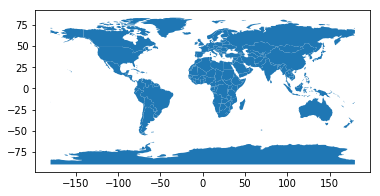

In [6]:
countries.plot()

What can we observe:

- Using `.head()` we can see the first rows of the dataset, just like we can do with Pandas.
- There is a 'geometry' column and the different countries are represented as polygons
- We can use the `.plot()` method to quickly get a *basic* visualization of the data

## What's a GeoDataFrame?

We used the GeoPandas library to read in the geospatial data, and this returned us a `GeoDataFrame`:

In [7]:
type(countries)

geopandas.geodataframe.GeoDataFrame

A GeoDataFrame contains a tabular, geospatial dataset:

* It has a **'geometry' column** that holds the geometry information (or features in GeoJSON).
* The other columns are the **attributes** (or properties in GeoJSON) that describe each of the geometries

Such a `GeoDataFrame` is just like a pandas `DataFrame`, but with some additional functionality for working with geospatial data:

* A `.geometry` attribute that always returns the column with the geometry information (returning a GeoSeries). The column name itself does not necessarily need to be 'geometry', but it will always be accessible as the `.geometry` attribute.
* It has some extra methods for working with spatial data (area, distance, buffer, intersection, ...), which we will see in later notebooks

In [8]:
countries.geometry

0      POLYGON ((61.21081709172574 35.65007233330923,...
1      (POLYGON ((23.90415368011818 -11.7222815894063...
2      POLYGON ((21.0200403174764 40.84272695572588, ...
3      POLYGON ((51.57951867046327 24.24549713795111,...
4      (POLYGON ((-66.95992000000001 -54.896810000000...
                             ...                        
172    (POLYGON ((167.844876743845 -16.46633310309713...
173    POLYGON ((52.00000980002224 19.0000033635161, ...
174    POLYGON ((19.89576785653443 -24.76779021576059...
175    POLYGON ((23.21504845550606 -17.52311614346598...
176    POLYGON ((29.43218834810904 -22.09131275806759...
Name: geometry, Length: 177, dtype: object

In [9]:
type(countries.geometry)

geopandas.geoseries.GeoSeries

In [10]:
countries.geometry.area

0       63.593500
1      103.599439
2        3.185163
3        7.095047
4      278.923392
          ...    
172      0.631326
173     38.475618
174    112.718524
175     62.789498
176     32.280371
Length: 177, dtype: float64

**It's still a DataFrame**, so we have all the pandas functionality available to use on the geospatial dataset, and to do data manipulations with the attributes and geometry information together.

For example, we can calculate average population number over all countries (by accessing the 'pop_est' column, and calling the `mean` method on it):

In [11]:
countries['pop_est'].mean()

41712369.84180791

Or, we can use boolean filtering to select a subset of the dataframe based on a condition:

In [12]:
africa = countries[countries['continent'] == 'Africa']

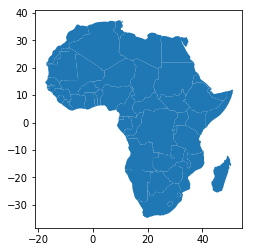

In [13]:
africa.plot()

---

The rest of the tutorial is going to assume you already know some pandas basics, but we will try to give hints for that part for those that are not familiar.   
A few resources in case you want to learn more about pandas:

- Pandas docs: https://pandas.pydata.org/pandas-docs/stable/10min.html
- Other tutorials: chapter from pandas in https://jakevdp.github.io/PythonDataScienceHandbook/, https://github.com/jorisvandenbossche/pandas-tutorial, https://github.com/TomAugspurger/pandas-head-to-tail, ...

<div class="alert alert-info" style="font-size:120%">
<b>REMEMBER</b>: <br>

<ul>
  <li>A `GeoDataFrame` allows to perform typical tabular data analysis together with spatial operations</li>
  <li>A `GeoDataFrame` (or *Feature Collection*) consists of:
   <ul>
    <li>**Geometries** or **features**: the spatial objects</li>
    <li>**Attributes** or **properties**: columns with information about each spatial object</li>
   </ul>
  </li>
</ul>
</div>

## Geometries: Points, Linestrings and Polygons

Spatial **vector** data can consist of different types, and the 3 fundamental types are:

* **Point** data: represents a single point in space.
* **Line** data ("LineString"): represents a sequence of points that form a line.
* **Polygon** data: represents a filled area.

And each of them can also be combined in multi-part geometries (See https://shapely.readthedocs.io/en/stable/manual.html#geometric-objects for extensive overview).

For the example we have seen up to now, the individual geometry objects are Polygons:

In [14]:
print(countries.geometry[2])

POLYGON ((21.0200403174764 40.84272695572588, 20.99998986174722 40.58000397395401, 20.67499677906363 40.43499990494303, 20.61500044117275 40.11000682225935, 20.15001590341052 39.62499766698397, 19.98000044117015 39.69499339452341, 19.96000166187321 39.91500580500605, 19.40608198413673 40.25077342382247, 19.31905887215714 40.72723012955356, 19.40354983895429 41.40956574153546, 19.54002729663711 41.71998607031276, 19.37176883309496 41.87754751237065, 19.37176816334725 41.8775506797835, 19.30448611825079 42.19574514420782, 19.73805138517963 42.68824738216557, 19.80161339689869 42.50009349219084, 20.07070000000004 42.58863000000008, 20.28375451018189 42.32025950781508, 20.52295000000004 42.21787000000006, 20.59024654668023 41.85540891928363, 20.59024743010491 41.85540416113361, 20.4631750830992 41.51508901627534, 20.60518191903736 41.08622630468523, 21.0200403174764 40.84272695572588))


Let's import some other datasets with different types of geometry objects.

A dateset about cities in the world (adapted from http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-populated-places/, zip file is available in the `/data` directory), consisting of Point data:

In [15]:
cities = geopandas.read_file("zip:///Users/robincole/Documents/Github/geopandas-tutorial/data/ne_110m_populated_places.zip")

In [16]:
print(cities.geometry[0])

POINT (12.45338654497177 41.90328217996012)


And a dataset of rivers in the world (from http://www.naturalearthdata.com/downloads/50m-physical-vectors/50m-rivers-lake-centerlines/, zip file is available in the `/data` directory) where each river is a (multi-)line:

### The `shapely` library

The individual geometry objects are provided by the [`shapely`](https://shapely.readthedocs.io/en/stable/) library

In [17]:
type(countries.geometry[0])

shapely.geometry.polygon.Polygon

To construct one ourselves:

In [18]:
from shapely.geometry import Point, Polygon, LineString

In [19]:
p = Point(1, 1)

In [20]:
print(p)

POINT (1 1)


In [21]:
polygon = Polygon([(1, 1), (2,2), (2, 1)])

<div class="alert alert-info" style="font-size:120%">
<b>REMEMBER</b>: <br><br>

Single geometries are represented by `shapely` objects:

<ul>
  <li>If you access a single geometry of a GeoDataFrame, you get a shapely geometry object</li>
  <li>Those objects have similar functionality as geopandas objects (GeoDataFrame/GeoSeries). For example:
   <ul>
    <li>`single_shapely_object.distance(other_point)` -> distance between two points</li>
    <li>`geodataframe.distance(other_point)` ->  distance for each point in the geodataframe to the other point</li>
   </ul>
  </li>
</ul>
</div>

In [23]:
countries.crs

{'init': 'epsg:4326'}

For the `countries` dataframe, it indicates that it used the EPSG 4326 / WGS84 lon/lat reference system, which is one of the most used.  
It uses coordinates as latitude and longitude in degrees, as can you be seen from the x/y labels on the plot:

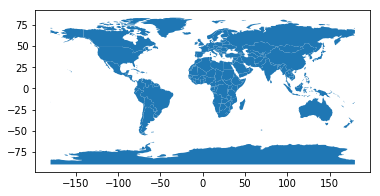

In [24]:
countries.plot()

## CRS
The `.crs` attribute is given as a dictionary. In this case, it only indicates the EPSG code, but it can also contain the full "proj4" string (in dictionary form). 

Under the hood, GeoPandas uses the `pyproj` / `proj4` libraries to deal with the re-projections.

For more information, see also http://geopandas.readthedocs.io/en/latest/projections.html.

---

There are sometimes good reasons you want to change the coordinate references system of your dataset, for example:

- different sources with different crs -> need to convert to the same crs
- distance-based operations -> if you a crs that has meter units (not degrees)
- plotting in a certain crs (eg to preserve area)

We can convert a GeoDataFrame to another reference system using the `to_crs` function. 

For example, let's convert the countries to the World Mercator projection (http://epsg.io/3395):

In [25]:
# remove Antartica, as the Mercator projection cannot deal with the poles
countries = countries[(countries['name'] != "Antarctica")]

In [26]:
countries_mercator = countries.to_crs(epsg=3395)  # or .to_crs({'init': 'epsg:3395'})

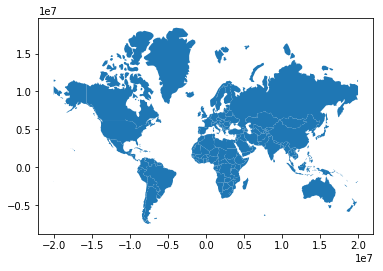

In [27]:
countries_mercator.plot()

Note the different scale of x and y.

## A bit more on importing and creating GeoDataFrames

### Constructing a GeoDataFrame manually

In [29]:
geopandas.GeoDataFrame({
    'geometry': [Point(1, 1), Point(2, 2)],
    'attribute1': [1, 2],
    'attribute2': [0.1, 0.2]})

,geometry,attribute1,attribute2
0,POINT (1 1),1,0.1
1,POINT (2 2),2,0.2


### Creating a GeoDataFrame from an existing dataframe

For example, if you have lat/lon coordinates in two columns:

In [30]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

In [31]:
df['Coordinates']  = list(zip(df.Longitude, df.Latitude))

In [32]:
df['Coordinates'] = df['Coordinates'].apply(Point)

In [33]:
gdf = geopandas.GeoDataFrame(df, geometry='Coordinates')

In [34]:
gdf

,City,Country,Latitude,Longitude,Coordinates
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66 -34.58)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91 -15.78)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66 -33.45)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08 4.6)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86 10.48)


See http://geopandas.readthedocs.io/en/latest/gallery/create_geopandas_from_pandas.html#sphx-glr-gallery-create-geopandas-from-pandas-py for full example